## 1. Introduction to Data Cleaning

**Q1: Explain the importance of data cleaning in the context of exploratory data analysis (EDA). Why is it crucial to address missing data, outliers, and duplicates?**

It's important to address data discrepancies like missing data, outliers, or duplicates because if left uncared for, they will negatively affect our data and make visualizations inaccurate. This makes it more difficult to analyse our data and take away useful information.

**Q2: Inspect the provided dataset and identify common issues like missing data, outliers, and duplicates. What is your approach to addressing these issues?**

We inspected the data and found many instances of missing data and outliers, but no duplicates. As shown below, we employed a variety of methods to first analyze the data, then clean it up by way of removing null rows or using an immutation method to fill missing data.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = pd.read_csv('retail_sales_data.csv')

df = pd.DataFrame(data)

# Identifying exact duplicates
duplicates = df[df.duplicated()]
print("\nExact Duplicate Rows:")
print(duplicates)
# No duplicates?

# Identifying partial duplicates
partial_duplicates = df[df.duplicated(subset=['order_id'])]
print("\nPartial Duplicate Rows (based on 'Order ID'):")
print(partial_duplicates)


Exact Duplicate Rows:
Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, unit_price, order_date, total]
Index: []

Partial Duplicate Rows (based on 'Order ID'):
Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, unit_price, order_date, total]
Index: []


## 2. Handling Missing Data
We didn't find any exact or partial duplicates in the dataset, and the heatmap shows us we do have some missing values in the quantity and unit_price columns. Below we'll first remove rows with missing 'quantity' values, then fill missing 'unit_price' values with their median.

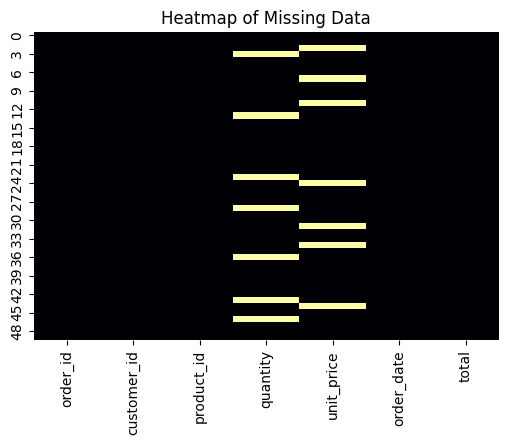


Null values before deleting & filling:
order_id       0
customer_id    0
product_id     0
quantity       7
unit_price     7
order_date     0
total          0
dtype: int64

Null values after deleting & filling:
order_id       0
customer_id    0
product_id     0
quantity       0
unit_price     0
order_date     0
total          0
dtype: int64


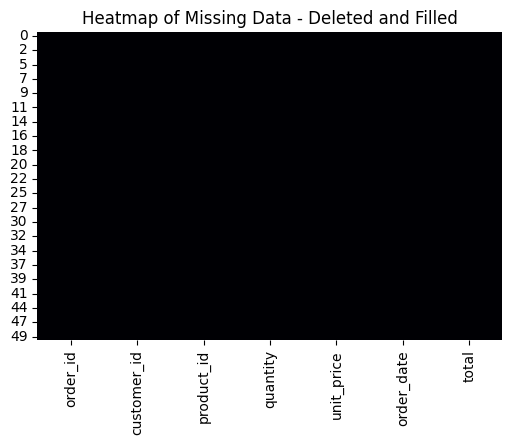

In [2]:
### Q1. Heatmap to find null values
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data")
plt.show()

### Q2. Handling missing values by deleting missing 'quantity' rows and filling missing 'unit_price' rows.
print("\nNull values before deleting & filling:")
print(df.isnull().sum())

# Dropping rows with null values
df = df.dropna(subset=['quantity'])

# Filling null values with median
df['unit_price'] = df['unit_price'].fillna(df['unit_price'].median())

print("\nNull values after deleting & filling:")
print(df.isnull().sum())

# Heatmap to show no null values
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data - Deleted and Filled")
plt.show()

## 3. Dealing with Outliers

**Q1. What are the advantages and disadvantages of using each method for detecting outliers?**

The box plot is helpful to immediately see outliers, since they give a graphical representation with the boxplot and circular outliers of where the data falls. In comparison, the z-score was unable to detect outliers at 3 standard deviations, so we had to move it down to 2 standard deviations before it was able to find outliers.

Now that we've removed or filled missing data, we need to address the outliers found in 'unit_price' earlier.


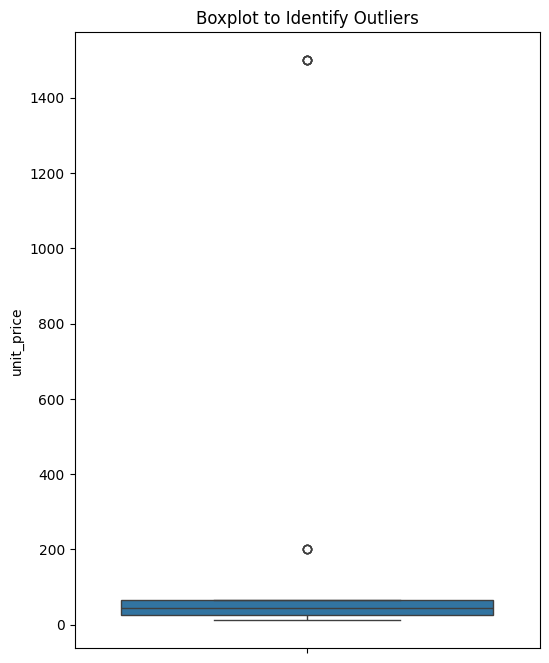

Outliers using Z-score:
     order_id  customer_id product_id  quantity  unit_price  order_date  \
9       1010          109       P009      10.0      1500.0  2024-01-25   
16      1017          115       P009       1.0      1500.0  2024-02-12   
27      1028          123       P009      10.0      1500.0  2024-03-07   
41      1042          137       P009      10.0      1500.0  2024-04-06   
49      1050          145       P009      10.0      1500.0  2024-04-22   

      total   z_score  
9   15000.0  2.740854  
16   1500.0  2.740854  
27  15000.0  2.740854  
41  15000.0  2.740854  
49  15000.0  2.740854  
float64


Text(0.5, 1.0, 'Log Transformed Data')

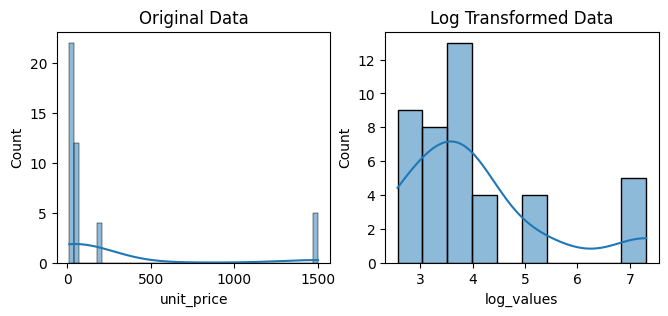

In [3]:
### Q1. Identifying outliers using a boxplot and Z-Scores
uprice_data=df.dropna(subset=['unit_price'])
uprice_data.head()


# Boxplot for identifying outliers
plt.figure(figsize=(6, 8))
sns.boxplot(uprice_data['unit_price'])
plt.title('Boxplot to Identify Outliers')
plt.show()


# Z-score method to identify outliers
from scipy import stats

data['z_score'] = np.abs(stats.zscore(uprice_data['unit_price']))
outliers_zscore = data[data['z_score'] > 2]

print("Outliers using Z-score:\n", outliers_zscore)


### Q2. Removing outliers using a log transformation

#Log transforming the values
data['log_values'] = np.log(uprice_data['unit_price'] + 1)
print(data['log_values'].dtypes)
#plotting the original vs new values

# Plotting the transformations
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
sns.histplot(data['unit_price'], kde=True)
plt.title('Original Data')

plt.subplot(1, 3, 2)
sns.histplot(data['log_values'], kde=True)
plt.title('Log Transformed Data')

## 4. Handling Duplicate Data
As we saw earlier, the dataset doesn't originally contain any exact or partial duplicates. This will be shown below.

Because both datasets created when using the '.duplicated' method are empty datasets, this means the methods were unable to find any duplicate values.

**Q1. How do duplicates impact data analysis?**

Duplicates affect a dataset by introducing exaggerated and inaccurate values by doubling entire rows or parts of a row. This information can heavily skew your data and is best to remove.

In [4]:
### Q1. Identifying then removing duplicates (if necessary)

# Identifying exact duplicates
duplicates = df[df.duplicated()]
print("\nExact Duplicate Rows:")
print(duplicates)
# No duplicates?

# Identifying partial duplicates
partial_duplicates = df[df.duplicated(subset=['order_id'])]
print("\nPartial Duplicate Rows (based on 'Order ID'):")
print(partial_duplicates)


Exact Duplicate Rows:
Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, unit_price, order_date, total]
Index: []

Partial Duplicate Rows (based on 'Order ID'):
Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, unit_price, order_date, total]
Index: []


## 5. Data Type Conversion and Standardization

**Q2: Which method would you recommend for this dataset and why?**

MinMax normalization is good to use when you don't have any outliers in that column of your dataset, while Z-score is preferable to deal with outliers.
    

Datatypes before Correction:
 order_id         int64
customer_id      int64
product_id      object
quantity       float64
unit_price     float64
order_date      object
total          float64
dtype: object

Datatypes after Correction:
 order_id                  int64
customer_id               int64
product_id               object
quantity                float64
unit_price              float64
order_date       datetime64[ns]
total                   float64
total_numeric             int64
dtype: object


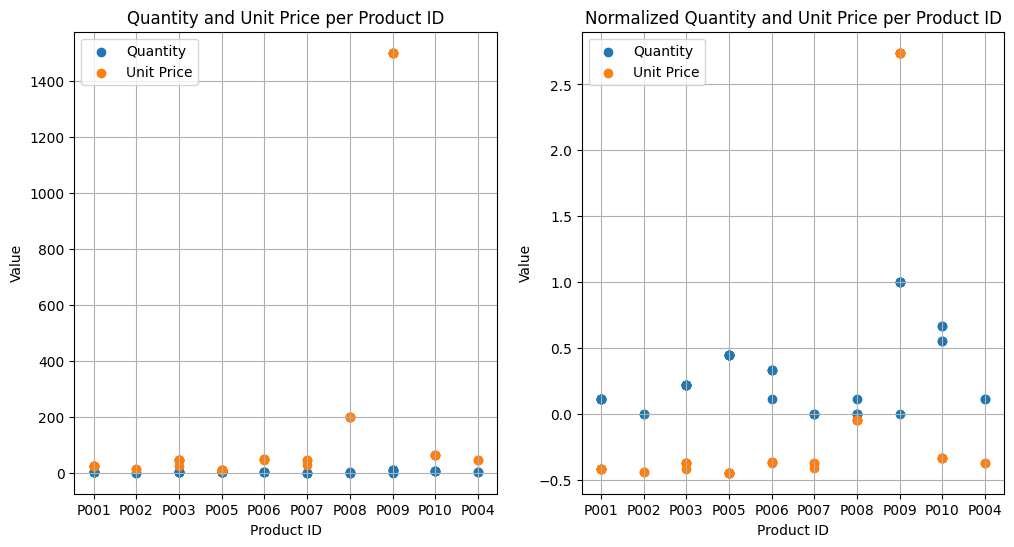

In [5]:
### Q1: Identifying datatypes then correcting them by conversion

# checking dataset datatypes
print("Datatypes before Correction:\n", df.dtypes)

# correcting datatypes
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['total_numeric'] = df['total'].astype('int64')

# datatypes after correction
print("\nDatatypes after Correction:\n", df.dtypes)


### Q2: Normalizing data using MinMax and Z-score

# normalizing with MinMax and Z-score
scaler = MinMaxScaler()
df['quantity_normalized'] = scaler.fit_transform(df[['quantity']])

scaler = StandardScaler()
df['unit_price_normalized'] = scaler.fit_transform(df[['unit_price']])

# showing unNormalized and Normalized quantity and unit price
plt.figure(figsize=(12, 6))

# unNormalized
plt.subplot(1, 2, 1)
plt.scatter(df['product_id'], df['quantity'], marker='o', label="Quantity")
plt.scatter(df['product_id'], df['unit_price'], marker='o', label="Unit Price")

plt.title('Quantity and Unit Price per Product ID')
plt.xlabel('Product ID')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Normalized
plt.subplot(1, 2, 2)
plt.scatter(df['product_id'], df['quantity_normalized'], marker='o', label="Quantity")
plt.scatter(df['product_id'], df['unit_price_normalized'], marker='o', label="Unit Price")

plt.title('Normalized Quantity and Unit Price per Product ID')
plt.xlabel('Product ID')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.show()

## 6. Data Transformation and Feature Engineering

**Q1: How can creating new features help you understand the dataset better?**

Features can be helpful to highlight new data hidden within your data. They can help make new comparisons that were previously unavailable.


Text(0.5, 1.0, 'Price categories')

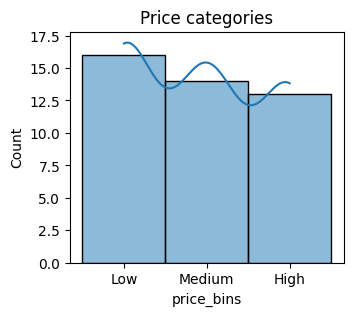

In [6]:
### Q1. Creating a new feature 'total_revenue' from unit price * quantity

df['total_revenue'] = df['unit_price'] * df['quantity']

### Q2. Perform binning on the unit_price column to create a categorical variable that groups products into different price ranges (e.g., low, medium, high)

# Creating equal-width bins for 'price'
df['price_bins'] = pd.qcut(df['unit_price'], q=3, labels=["Low", "Medium", "High"])

# Plotting the transformations
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
sns.histplot(df['price_bins'], kde=True)
plt.title('Price categories')

## 7. Final Cleaning Workflow and Best Practices

**Q1: How does combining techniques like handling missing values, addressing outliers, and feature engineering create a more cohesive dataset for analysis?**

By combining different techniques, we address multiple issues and are able to reach a higher level of confidence in our dataset's accuracy before analysing it.

**Q2: Why is it important to document your data cleaning steps, and how can tools like Python's pandas in maintaining reproducibility?**

Documenting your data cleaning steps and code is crucial to writing readeable and reproduceable procedures and code. Details can easily get lost when you didn't think they would, so it's best to just be diligent and thoroughly document.

In [7]:
# Exporting dataframe to csv
df.to_csv('cleaned_retail_sales_data.csv')